In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math
from itertools import islice
from graphillion import GraphSet

In [24]:
# 第k最短路
n = 5
G = nx.grid_2d_graph(n,n) # n×n
pos = {(i,j): (i,j) for (i,j) in G.nodes()}

for (i,j) in G.edges():
    G[i][j]["weight"] = random.randint(1,10)

In [25]:
def path_length(G, path):
    _sum = 0
    i = path[0]
    for count in range(1, len(path)):
        j = path[count]
        _sum += G[i][j]["weight"]
        i = j
    return _sum

k = 10
for path in islice(nx.shortest_simple_paths(G, source=(0,0), target=(n-1, n-1), weight="weight"), k):
    print(path, path_length(G, path))

[(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)] 35
[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)] 36
[(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4)] 37
[(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4)] 37
[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)] 37
[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4)] 38
[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4)] 38
[(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)] 38
[(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)] 39
[(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4)] 39


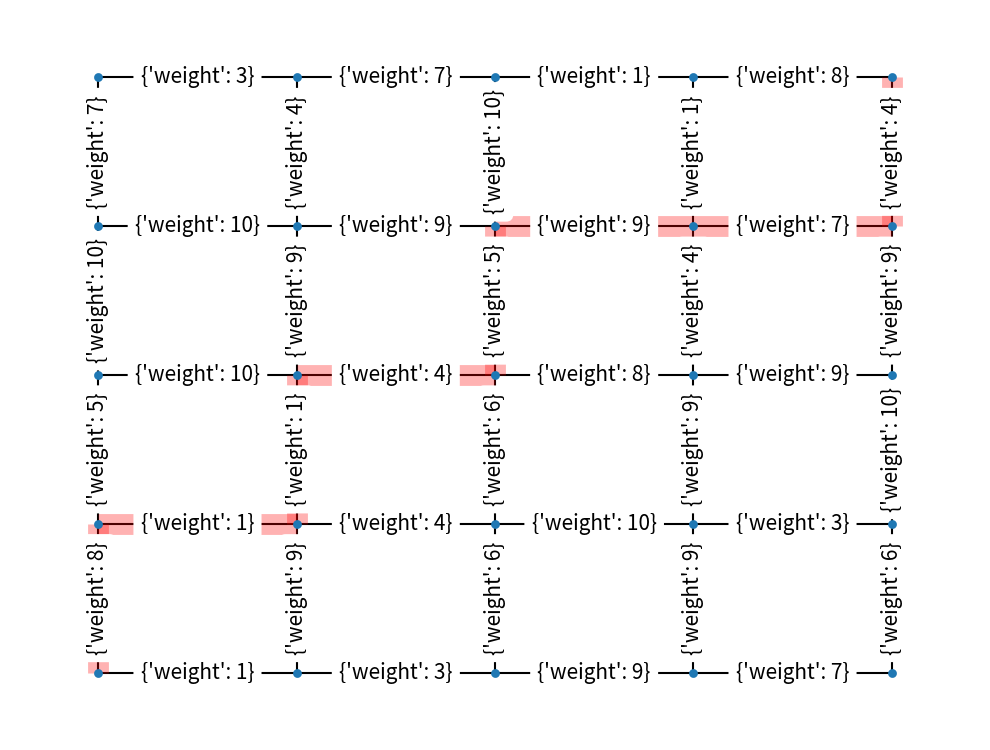

In [26]:
edge_list = []
i = path[0]

for count in range(1, len(path)):
    j = path[count]
    edge_list.append((i, j))
    i = j

plt.figure()
nx.draw(G, pos=pos, with_labels=False, node_size=10)
nx.draw(
    G,
    pos=pos,
    with_labels=False,
    node_size=10,
    edgelist=edge_list,
    edge_color="red",
    width=10,
    alpha=.3
)
nx.draw_networkx_edge_labels(G, pos)
plt.show()

In [27]:
random.seed(1)
n = 5
G = nx.grid_2d_graph(n, n)
pos = {(i, j): (i, j) for (i, j) in G.nodes()}
weight = {}
for (i, j) in G.edges():
    weight[i, j] = random.randint(1, 10)

GraphSet.set_universe(G.edges())
paths = GraphSet.paths(terminal1=(0, 0), terminal2=(n - 1, n - 1))
len(paths)  # パスの総数

8512

In [28]:
count = 0
for p in paths.min_iter(weight):
    count += 1
    if count >= 10:
        break
    print(p)

[((0, 0), (1, 0)), ((1, 0), (2, 0)), ((2, 0), (2, 1)), ((2, 1), (2, 2)), ((2, 2), (2, 3)), ((2, 3), (3, 3)), ((3, 3), (4, 3)), ((4, 3), (4, 4))]
[((0, 0), (1, 0)), ((1, 0), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (2, 2)), ((2, 2), (2, 3)), ((2, 3), (3, 3)), ((3, 3), (4, 3)), ((4, 3), (4, 4))]
[((0, 0), (1, 0)), ((1, 0), (1, 1)), ((1, 1), (2, 1)), ((2, 1), (2, 2)), ((2, 2), (2, 3)), ((2, 3), (3, 3)), ((3, 3), (4, 3)), ((4, 3), (4, 4))]
[((0, 0), (1, 0)), ((1, 0), (2, 0)), ((2, 0), (2, 1)), ((2, 1), (2, 2)), ((2, 2), (3, 2)), ((3, 2), (4, 2)), ((4, 2), (4, 3)), ((4, 3), (4, 4))]
[((0, 0), (1, 0)), ((1, 0), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (2, 2)), ((2, 2), (3, 2)), ((3, 2), (4, 2)), ((4, 2), (4, 3)), ((4, 3), (4, 4))]
[((0, 0), (0, 1)), ((0, 1), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (2, 2)), ((2, 2), (2, 3)), ((2, 3), (3, 3)), ((3, 3), (4, 3)), ((4, 3), (4, 4))]
[((0, 0), (1, 0)), ((1, 0), (2, 0)), ((2, 0), (2, 1)), ((2, 1), (2, 2)), ((2, 2), (2, 3)), ((2, 3), (3, 3)), ((3, 3), (3, 4)), ((3

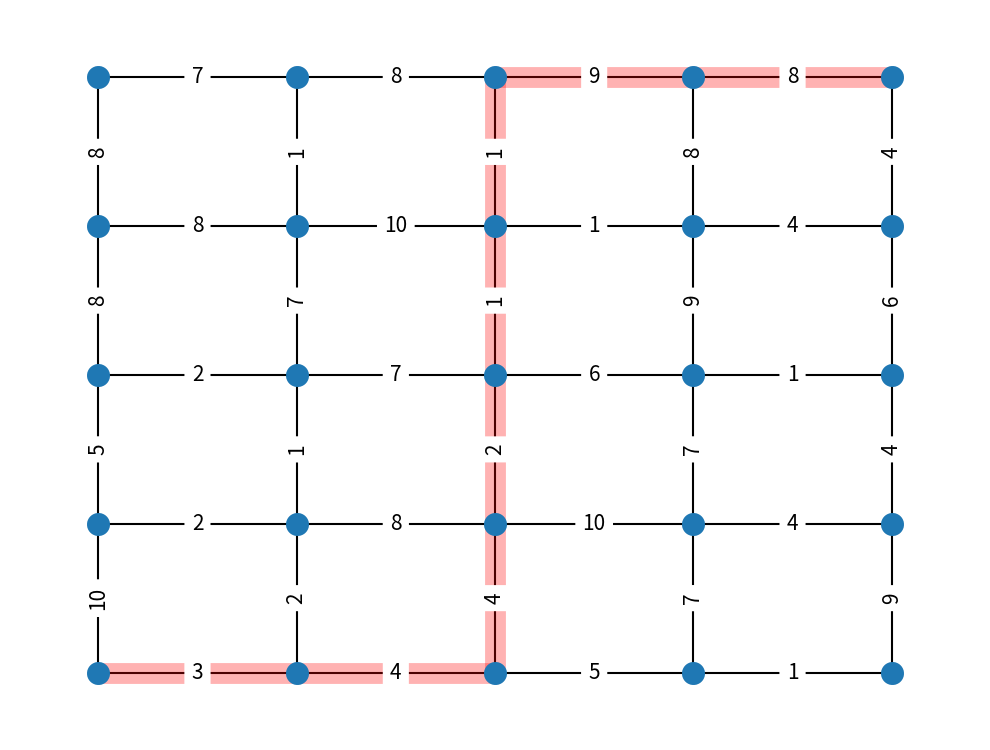

In [29]:
plt.figure()
nx.draw(G, pos=pos, with_labels=False, node_size=100)
nx.draw(
    G,
    pos=pos,
    with_labels=False,
    node_size=100,
    edgelist=p,
    edge_color="red",
    width=10,
    alpha=0.3,
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight)
plt.show()

In [30]:
# 最長path
count = 0
for p in paths.max_iter(weight):
    count += 1
    if count >= 2:
        break
    print(p)

[((0, 0), (0, 1)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 3), (0, 4)), ((0, 4), (1, 4)), ((1, 0), (1, 1)), ((1, 0), (2, 0)), ((1, 1), (2, 1)), ((1, 2), (1, 3)), ((1, 2), (2, 2)), ((1, 3), (2, 3)), ((1, 4), (2, 4)), ((2, 0), (3, 0)), ((2, 1), (3, 1)), ((2, 2), (3, 2)), ((2, 3), (3, 3)), ((2, 4), (3, 4)), ((3, 0), (4, 0)), ((3, 1), (3, 2)), ((3, 3), (3, 4)), ((4, 0), (4, 1)), ((4, 1), (4, 2)), ((4, 2), (4, 3)), ((4, 3), (4, 4))]


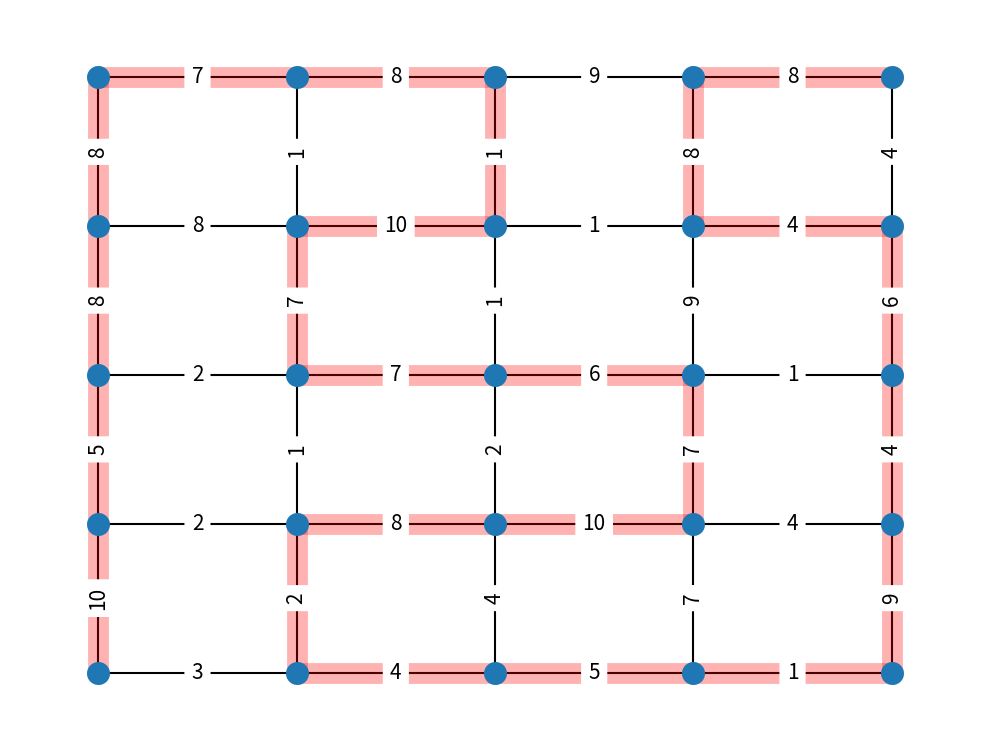

In [32]:
plt.figure()
nx.draw(G, pos=pos, with_labels=False, node_size=100)
nx.draw(
    G,
    pos=pos,
    with_labels=False,
    node_size=100,
    edgelist=p,
    edge_color="red",
    width=10,
    alpha=.3
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight)
plt.show()

In [33]:
def distance(x1, y1, x2, y2):
    """distance: euclidean distance between (x1,y1) and (x2,y2)"""
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

n = 10
x = dict([(i, 100 * random.random()) for i in range(n)])
y = dict([(i, 100 * random.random()) for i in range(n)])
G = nx.Graph()
c = {}
pos = {}
for i in range(n):
    pos[i] = x[i], y[i]
    for j in range(n):
        if j > i:
            c[i, j] = distance(x[i], y[i], x[j], y[j])
            G.add_edge(i, j, weight=c[i, j])

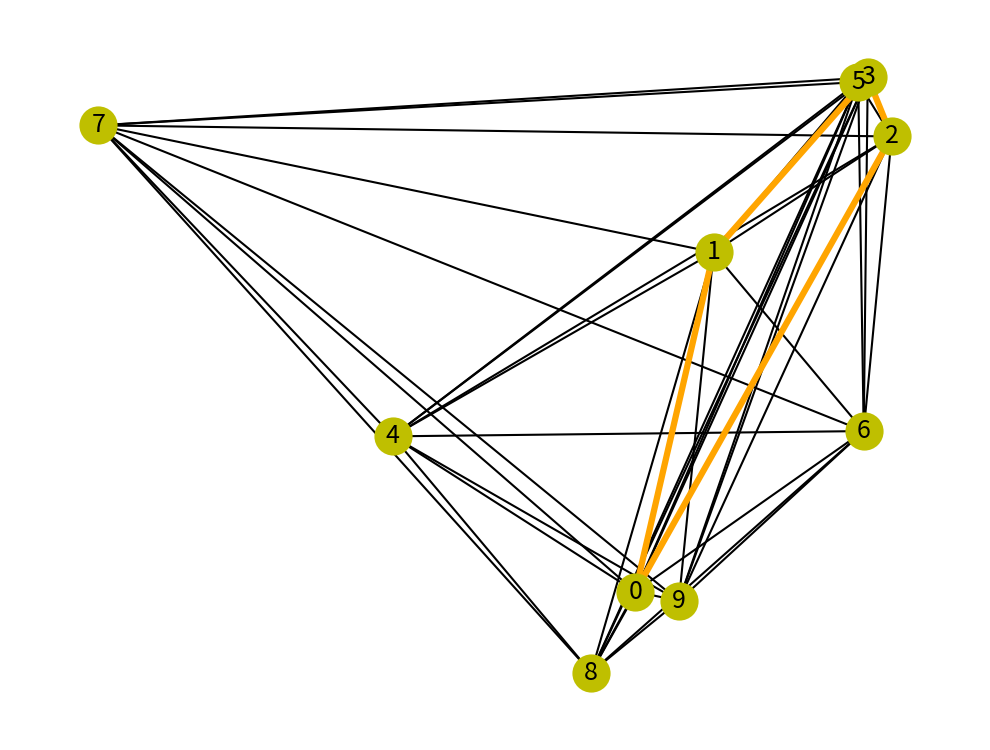

In [35]:
edges = list(G.edges())
GraphSet.set_universe(edges)

cycles = GraphSet.cycles()
gs = cycles.graph_size(4)
gs2 = gs.including(0)  # include depot
cycle = gs2.choice()
nx.draw(G, pos=pos, with_labels=True, node_color="y")
nx.draw_networkx_edges(G, pos=pos, edgelist=cycle, edge_color="orange", width=3);

181440


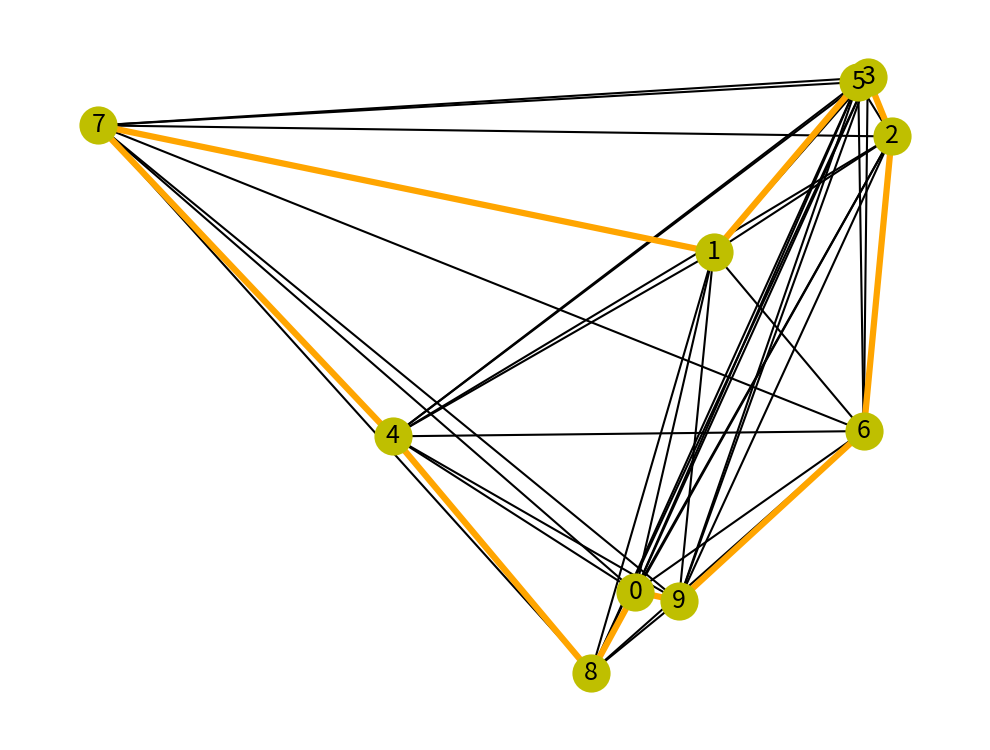

In [37]:
# ハミルトン閉路の列挙を行う
cycles = GraphSet.cycles(is_hamilton=True)
print(len(cycles))

for p in cycles.min_iter(c):
    hamilton_cycle = p
    break
nx.draw(G, pos=pos, with_labels=True, node_color="y")
nx.draw_networkx_edges(
    G,
    pos=pos,
    edgelist=hamilton_cycle,
    edge_color="orange",
    width=3
)